In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sqlite3

import warnings 
warnings.filterwarnings(action= 'ignore')

### EDA

In [4]:
# Import file

url="https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/elpac.csv"
df = pd.read_csv(url)

In [5]:
# Convert date fields to datetime
df['DOB'] =  pd.to_datetime(df.DOB)
df['TestDate'] =  pd.to_datetime(df.TestDate)

In [6]:
# Missing data value counts by AcademicYear
# Most missing data is from when the pandemic quarantine went into effect, March, 2020
# The 2020-2021 school year also has many students who did not test due to distance learning, making it difficult to test all students
df[(df.TestDate.isna() == True)]['AcademicYear'].value_counts().sort_index(ascending=False)

2020-2021     858
2019-2020    1255
2018-2019      46
Name: AcademicYear, dtype: int64

In [7]:
# Initial view of shape and missing data
print("Shape: ",df.shape,"\n")

# Columns missing data
df.isnull().sum().to_frame(name='Missing').query('Missing > 0')

Shape:  (11669, 24) 



,Missing
TestAge,2159
TestDayName,2159
TestDate,2159
AttendedPct,3
GradeAttendedPct,3


In [8]:
# Re-load data omitting missing data
df = df[(df.TestDate.isna() == False)]

print("Shape: ",df.shape,"\n")

# Columns missing data
df.isnull().sum().to_frame(name='Missing').query('Missing > 0')

Shape:  (9510, 24) 



,Missing
AttendedPct,2
GradeAttendedPct,2


In [9]:
# Repeat...to verify no more data is missing
df = df[(df.AttendedPct.isna() == False)]

print("Shape: ",df.shape,"\n")

# Columns missing data
df.isnull().sum().to_frame(name='Missing').query('Missing > 0')

Shape:  (9508, 24) 



,Missing


In [10]:
# Identify features that are object dtype, to create dummy variables for
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9508 entries, 0 to 11668
Data columns (total 9 columns):
AcademicYear         9508 non-null object
StudentGender        9508 non-null object
StudentEthnicity     9508 non-null object
Special_Education    9508 non-null object
Homeless             9508 non-null object
SocioEconomically    9508 non-null object
TestDayName          9508 non-null object
TeacherGender        9508 non-null object
TeacherEthnicity     9508 non-null object
dtypes: object(9)
memory usage: 742.8+ KB


In [11]:
#check for duplicated rows in the dataset
duplicated_rows = df[df.duplicated()] 
print("number of duplicate rows: ", duplicated_rows.shape)

number of duplicate rows:  (0, 24)


In [12]:
# Create dummy values from 'object' data types to get correlation values
df2 = pd.get_dummies(df, columns=['AcademicYear', 'StudentGender', 'StudentEthnicity', 'Special_Education', 'Homeless', 'SocioEconomically', 'TestDayName', 'TeacherGender', 'TeacherEthnicity'])

In [13]:
# Correlation for dummy variables for Overall Score
cor = pd.DataFrame(df2.corrwith(df2['OverallScore']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallScore,1
OverallLevel,0.527654
GradeAttendedPct,0.264209
TestAge,0.260976
GradeEnrolledPct,0.259709
GradeLevel,0.258578
AttendedPct,0.150699
DaysAttended,0.146288
AcademicYear_2020-2021,0.0745293
School_deID,0.0690092


In [14]:
# Correlation for dummy variables for Overall Level
cor = pd.DataFrame(df2.corrwith(df2['OverallLevel']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallLevel,1
OverallScore,0.527654
AcademicYear_2017-2018,0.148799
DaysAttended,0.0928014
AttendedPct,0.0896151
StudentGender_F,0.0838542
ExpectedAttendanceDays,0.0474934
EnrolledPct,0.0474934
School_deID,0.0430825
AcademicYear_2018-2019,0.0378764


<AxesSubplot:>

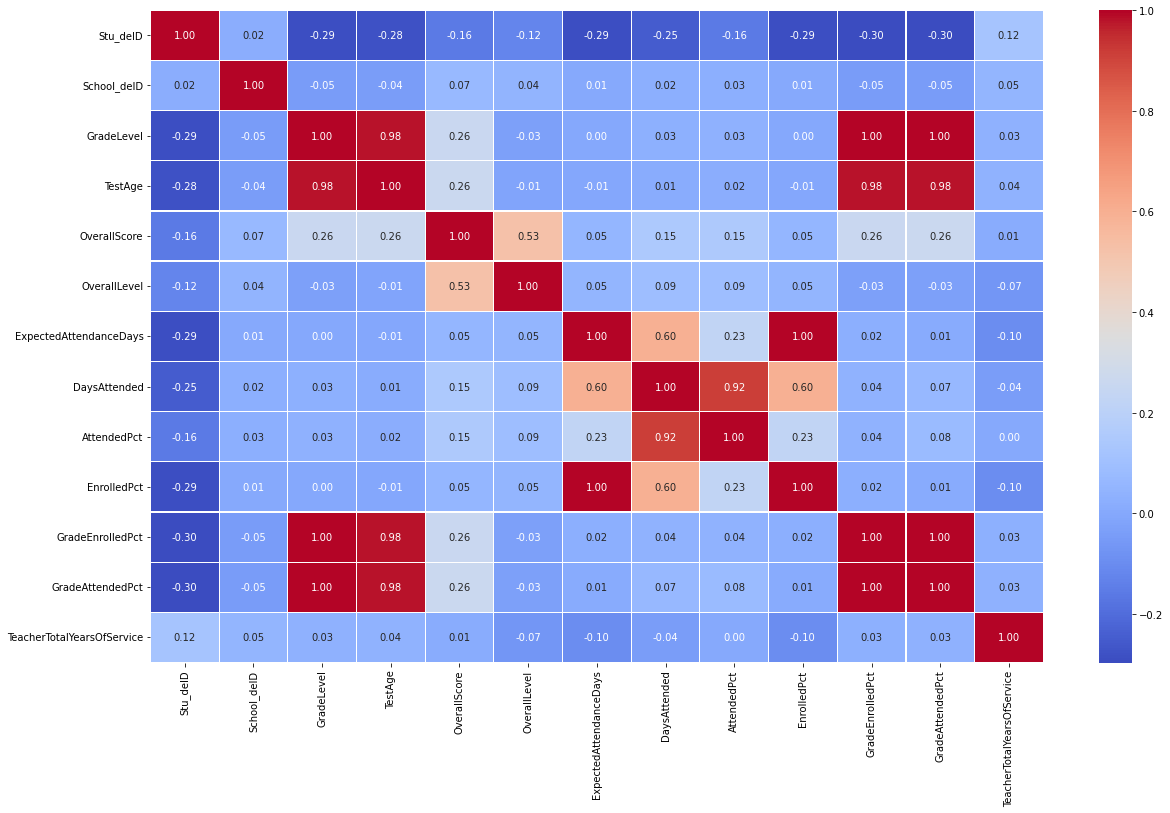

In [15]:
# Correlation Matrix
pearsoncorr = df.corr(method='pearson')

plt.figure(figsize= (20, 12))

sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='coolwarm',
            fmt=".2f",
            annot=True,
            linewidth=0.25)

In [16]:
df

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,TestDate,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity
0,2017-2018,0,3,1,2011-07-04,6.828340,F,Hispanic,N,Y,Y,Wednesday,2018-05-02,1503,4,180.0,175.0,0.972222,1.000000,1.999999,1.972222,F,4,Hispanic
1,2017-2018,1,5,4,2008-07-28,9.631957,M,Hispanic,N,N,Y,Friday,2018-03-16,1535,3,180.0,168.0,0.933333,1.000000,4.999999,4.933333,F,2,Multiple
2,2017-2018,3,3,4,2008-05-06,9.905748,M,Hispanic,Y,N,N,Monday,2018-04-02,1480,2,180.0,175.0,0.972222,1.000000,4.999999,4.972222,F,18,White
3,2017-2018,4,3,0,2012-04-13,6.108271,M,Hispanic,N,N,Y,Wednesday,2018-05-23,1461,4,180.0,125.0,0.694444,1.000000,0.999999,0.694444,F,1,White
4,2017-2018,5,7,0,2011-09-25,6.664066,M,Hispanic,N,N,Y,Friday,2018-05-25,1357,1,180.0,165.0,0.916667,1.000000,0.999999,0.916667,F,17,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11664,2021-2022,3983,1,2,2014-08-01,7.819462,M,Filipino,Y,N,Y,Friday,2022-05-27,425,1,170.0,123.0,0.723529,0.944444,2.944444,2.723529,F,24,White
11665,2021-2022,3451,9,3,2012-09-09,9.681239,M,Hispanic,Y,N,Y,Monday,2022-05-16,545,2,170.0,148.0,0.870588,0.944444,3.944444,3.870588,F,1,White
11666,2021-2022,2834,0,3,2012-11-28,9.391021,F,Hispanic,Y,Y,Y,Wednesday,2022-04-20,576,3,170.0,149.0,0.876471,0.944444,3.944444,3.876471,M,6,Hispanic
11667,2021-2022,4790,6,0,2015-12-14,6.461461,M,Hispanic,Y,N,Y,Tuesday,2022-05-31,249,2,169.0,108.0,0.639053,0.938889,0.938889,0.639053,F,16,White


In [17]:
#subset the categorical and numerical feautures
num_feat =['Stu_deID','School_deID','GradeLevel','TeacherTotalYearsOfService','OverallScore','ExpectedAttendanceDays','DaysAttended','AttendedPct','EnrolledPct','GradeEnrolledPct','GradeAttendedPct']
cat_feat= ['StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically','TestDayName','TeacherGender','TeacherEthnicity']
target = ['OverallLevel']
# 'AcademicYear','DOB','TestDate','OverallScore',  ##this columns cant be plotted

<Figure size 432x288 with 0 Axes>

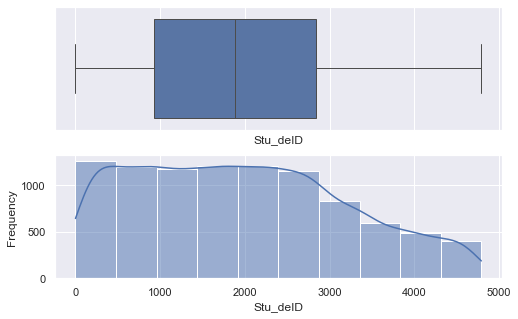

<Figure size 576x360 with 0 Axes>

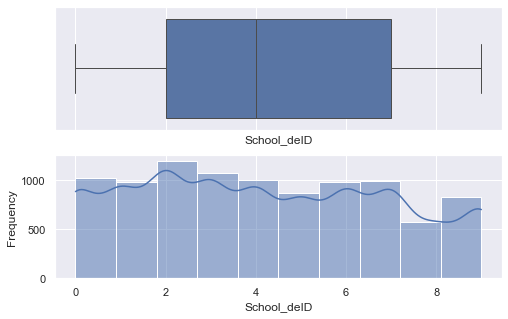

<Figure size 576x360 with 0 Axes>

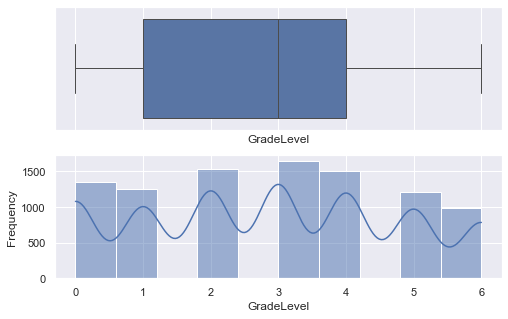

<Figure size 576x360 with 0 Axes>

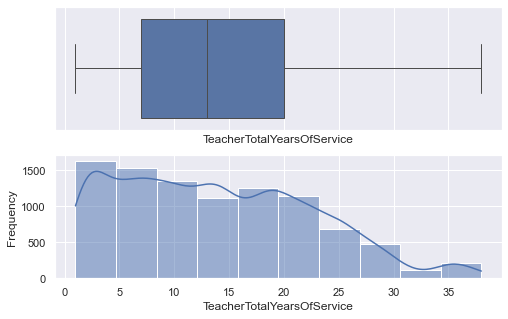

<Figure size 576x360 with 0 Axes>

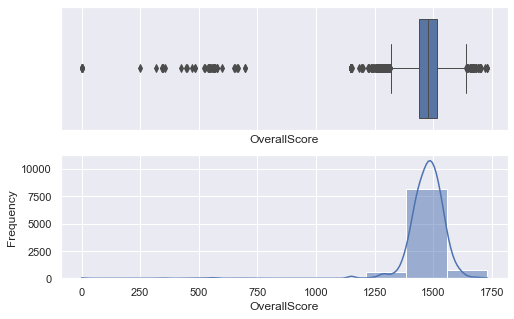

<Figure size 576x360 with 0 Axes>

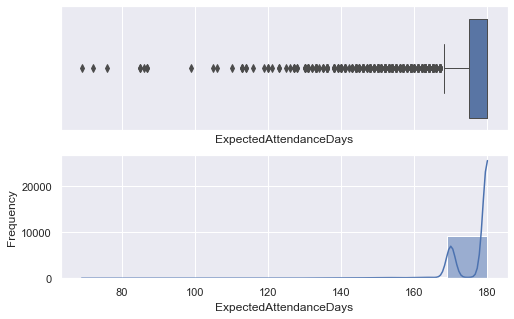

<Figure size 576x360 with 0 Axes>

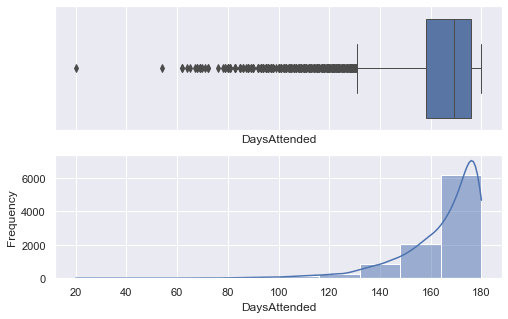

<Figure size 576x360 with 0 Axes>

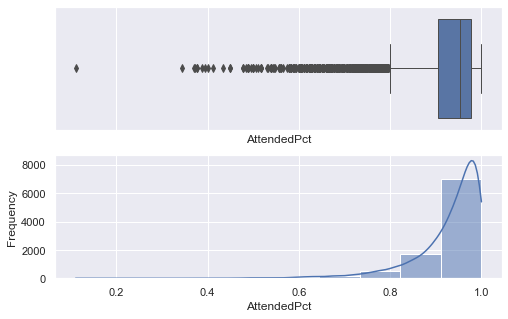

<Figure size 576x360 with 0 Axes>

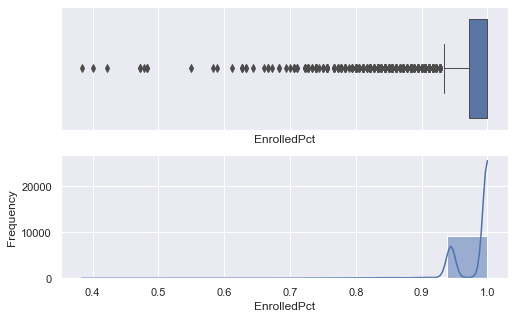

<Figure size 576x360 with 0 Axes>

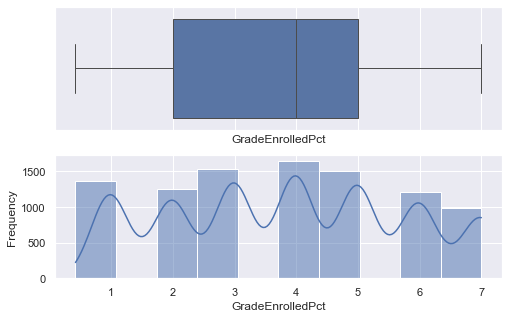

<Figure size 576x360 with 0 Axes>

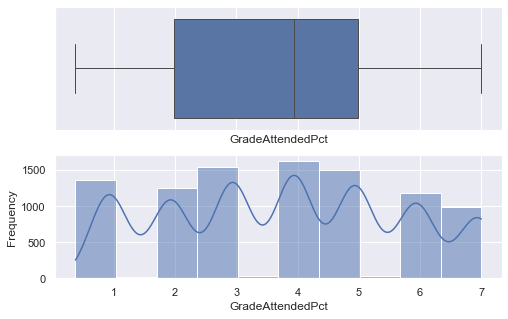

In [18]:
#plot the numerical columns distributions and boxplots to detect outliers
for o in df[num_feat].columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})  
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= o,ylabel='Frequency')
    sns.boxplot(df[o], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[o], ax=ax_hist , bins = 10,kde=True)

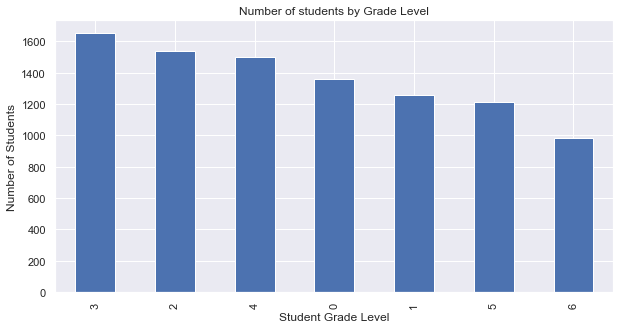

In [22]:
df.GradeLevel.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of students by Grade Level")
plt.ylabel('Number of Students')
plt.xlabel('Student Grade Level');